#### Project 7: Chapter 6: Hypothesis Testing

In [1]:
import numpy as np
import pandas as pd

mutual_fund_data = pd.read_csv("E:\Top100MutualFunds.csv")
mutual_fund_data

,Symbol,Name,Category1,Category2,Category3,Morningstar Category,Morningstar Rating,Market cap,Current yield,Fees,Action
0,AGTHX,American Funds The Growth Fund of America Class A,US Equity,Broad market,Large cap,Large Growth,3.0,"$138,592,080,000",0.22%,0.62%,Analyze
1,FCNTX,Fidelity Contrafund Fund,US Equity,Broad market,Large cap,Large Growth,3.0,"$121,762,870,000",0.00%,0.74%,Analyze
2,CWMAX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.46%,0.63%,Analyze
3,CWMCX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",0.79%,1.40%,Analyze
4,CWMEX,American Funds Washington Mutual Investors Fun...,US Equity,Broad market,Large cap,Large Blend,3.0,"$113,300,000,000",1.28%,0.87%,Analyze
...,...,...,...,...,...,...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.51%,Analyze
96,FDYZX,Franklin DynaTech Fund Advisor Class,US Equity,Broad market,Large cap,Large Growth,5.0,"$9,600,000,000",0.00%,0.62%,Analyze
97,BBVLX,Bridge Builder Large Cap Value Fund,US Equity,Broad market,Large cap,Large Value,4.0,"$9,500,000,000",1.55%,0.25%,Analyze
98,PEYAX,Putnam Large Cap Value Fund Class A,US Equity,Broad market,Large cap,Large Value,4.0,"$9,393,340,000",1.23%,0.91%,Analyze


In [2]:
to_drop = [
    "Category2", "Category1", "Category3", "Morningstar Rating",
    "Current yield", "Action"
]
mutual_fund_data = mutual_fund_data.drop(columns=to_drop)
mutual_fund_data.head()


,Symbol,Name,Morningstar Category,Market cap,Fees
0,AGTHX,American Funds The Growth Fund of America Class A,Large Growth,"$138,592,080,000",0.62%
1,FCNTX,Fidelity Contrafund Fund,Large Growth,"$121,762,870,000",0.74%
2,CWMAX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",0.63%
3,CWMCX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",1.40%
4,CWMEX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",0.87%


In [3]:
#!pip install pandas-datareader

In [4]:
import pandas_datareader.data as web
import yfinance as yf
from datetime import datetime  

mutual_fund_dict = {}
symbols = list(mutual_fund_data["Symbol"])

start = datetime(1980, 1, 1)
end = datetime(2020, 1, 1)
(start, end, symbols)

(datetime.datetime(1980, 1, 1, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 ['AGTHX',
  'FCNTX',
  'CWMAX',
  'CWMCX',
  'CWMEX',
  'CWMFX',
  'AIVSX',
  'AWSHX',
  'ANCFX',
  'AMCFX',
  'CAFAX',
  'CAFCX',
  'CAFEX',
  'CAFFX',
  'FMACX',
  'TRBCX',
  'AFMFX',
  'AMRFX',
  'CMLAX',
  'CMLCX',
  'CMLEX',
  'CMLFX',
  'FDGRX',
  'FBGRX',
  'AMCPX',
  'EAGRX',
  'AMRMX',
  'FMAGX',
  'HACAX',
  'FLPSX',
  'PRGFX',
  'PRNHX',
  'DFQTX',
  'DFEOX',
  'FLPKX',
  'RPMGX',
  'FOCPX',
  'CNGAX',
  'CNGCX',
  'CNGEX',
  'CNGFX',
  'FNEFX',
  'FOCKX',
  'DFLVX',
  'CDDRX',
  'CDDYX',
  'CDIRX',
  'CVIRX',
  'TWCUX',
  'EGFFX',
  'EGFIX',
  'ANEFX',
  'HLIEX',
  'FRDPX',
  'FRDAX',
  'FRDRX',
  'FRISX',
  'PRHSX',
  'PRILX',
  'DDFIX',
  'DDFRX',
  'VAFAX',
  'PCBIX',
  'FCGAX',
  'FGSRX',
  'FIFRX',
  'PRFDX',
  'PRBLX',
  'JVMIX',
  'VWNFX',
  'FKGRX',
  'PRDGX',
  'AULDX',
  'AULGX',
  'AULNX',
  'AULRX',
  'AULYX',
  'AKRSX',
  'MFEIX',
  'POLIX',
  'FKDNX',
  'MADVX',
  'VWUSX',
  'LSGRX',


In [5]:

yf.pdr_override()
fund_data = web.get_data_yahoo(symbols, start, end) 

[*********************100%%**********************]  100 of 100 completed

1 Failed download:
['EAGRX']: Exception("%ticker%: Data doesn't exist for startDate = 315550800, endDate = 1577854800")


In [6]:
fund_data

Price       Adj Close                                                         \
Ticker          AFMFX      AGTHX      AIVSX      AKRIX      AKRSX      AMCFX   
Date                                                                           
1980-01-02        NaN   0.599009        NaN        NaN        NaN        NaN   
1980-01-03        NaN   0.609457        NaN        NaN        NaN        NaN   
1980-01-04        NaN   0.609457        NaN        NaN        NaN        NaN   
1980-01-07        NaN   0.625129        NaN        NaN        NaN        NaN   
1980-01-08        NaN   0.632094        NaN        NaN        NaN        NaN   
...               ...        ...        ...        ...        ...        ...   
2019-12-24  36.736095  40.456985  32.380341  39.849663  40.053387  27.291409   
2019-12-26  36.820656  40.662514  32.519527  39.963573  40.167400  27.380093   
2019-12-27  36.846024  40.654606  32.519527  40.016140  40.220020  27.372032   
2019-12-30  36.702271  40.298893  32.298470  39.875950  40.070927  27.194658   
2019-12-31  36.786831  40.417461  32.396725  39.963573  40.167400  27.259161   

Price                                                   ... Volume        \
Ticker          AMCPX      AMRFX      AMRMX      ANCFX  ...  PRNHX RPMGX   
Date                                                    ...                
1980-01-02        NaN        NaN        NaN   0.683940  ...      0   NaN   
1980-01-03        NaN        NaN        NaN   0.680124  ...      0   NaN   
1980-01-04        NaN        NaN        NaN   0.690618  ...      0   NaN   
1980-01-07        NaN        NaN        NaN   0.693480  ...      0   NaN   
1980-01-08        NaN        NaN        NaN   0.710649  ...      0   NaN   
...               ...        ...        ...        ...  ...    ...   ...   
2019-12-24  27.186575  36.895554  37.228836  48.387199  ...      0   0.0   
2019-12-26  27.275551  36.980488  37.314507  48.605892  ...      0   0.0   
2019-12-27  27.259373  37.005966  37.340199  48.652760  ...      0   0.0   
2019-12-30  27.081417  36.861568  37.194572  48.316891  ...      0   0.0   
2019-12-31  27.154217  36.946510  37.280239  48.441868  ...      0   0.0   

Price                                                       
Ticker     SBLYX SEEGX TRBCX TWCGX TWCUX VAFAX VWNFX VWUSX  
Date                                                        
1980-01-02   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-03   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-04   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-07   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
1980-01-08   NaN   NaN   NaN     0   NaN   NaN   NaN     0  
...          ...   ...   ...   ...   ...   ...   ...   ...  
2019-12-24   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-26   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-27   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-30   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-31   0.0   0.0   0.0     0   0.0   0.0   0.0     0  

[10087 rows x 600 columns]

In [7]:
 
fund_data.tail()

Price       Adj Close                                                         \
Ticker          AFMFX      AGTHX      AIVSX      AKRIX      AKRSX      AMCFX   
Date                                                                           
2019-12-24  36.736095  40.456985  32.380341  39.849663  40.053387  27.291409   
2019-12-26  36.820656  40.662514  32.519527  39.963573  40.167400  27.380093   
2019-12-27  36.846024  40.654606  32.519527  40.016140  40.220020  27.372032   
2019-12-30  36.702271  40.298893  32.298470  39.875950  40.070927  27.194658   
2019-12-31  36.786831  40.417461  32.396725  39.963573  40.167400  27.259161   

Price                                                   ... Volume        \
Ticker          AMCPX      AMRFX      AMRMX      ANCFX  ...  PRNHX RPMGX   
Date                                                    ...                
2019-12-24  27.186575  36.895554  37.228836  48.387199  ...      0   0.0   
2019-12-26  27.275551  36.980488  37.314507  48.605892  ...      0   0.0   
2019-12-27  27.259373  37.005966  37.340199  48.652760  ...      0   0.0   
2019-12-30  27.081417  36.861568  37.194572  48.316891  ...      0   0.0   
2019-12-31  27.154217  36.946510  37.280239  48.441868  ...      0   0.0   

Price                                                       
Ticker     SBLYX SEEGX TRBCX TWCGX TWCUX VAFAX VWNFX VWUSX  
Date                                                        
2019-12-24   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-26   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-27   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-30   0.0   0.0   0.0     0   0.0   0.0   0.0     0  
2019-12-31   0.0   0.0   0.0     0   0.0   0.0   0.0     0  

[5 rows x 600 columns]

In [8]:
close_data = fund_data["Adj Close"]
close_data.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,PRNHX,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-24,36.736095,40.456985,32.380341,39.849663,40.053387,27.291409,27.186575,36.895554,37.228836,48.387199,...,42.597168,75.295692,38.965015,32.529133,102.683052,28.506140,41.435978,14.698990,27.681656,36.163040
2019-12-26,36.820656,40.662514,32.519527,39.963573,40.167400,27.380093,27.275551,36.980488,37.314507,48.605892,...,42.654209,75.366707,39.279423,32.744980,103.558838,28.757088,41.826435,14.812883,27.788210,36.432030
2019-12-27,36.846024,40.654606,32.519527,40.016140,40.220020,27.372032,27.259373,37.005966,37.340199,48.652760,...,42.504475,75.287804,39.257988,32.721001,103.624947,28.741405,41.802525,14.819583,27.788210,36.398407
2019-12-30,36.702271,40.298893,32.298470,39.875950,40.070927,27.194658,27.081417,36.861568,37.194572,48.316891,...,42.190731,75.003761,38.929291,32.409222,102.666527,28.513985,41.459881,14.698990,27.643599,36.045353
2019-12-31,36.786831,40.417461,32.396725,39.963573,40.167400,27.259161,27.154217,36.946510,37.280239,48.441868,...,42.333340,75.216797,39.022186,32.481167,102.740883,28.568878,41.563473,14.732487,27.712099,36.163040


In [9]:
close_data["S&P 500"] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed
C:\Users\hkmah\AppData\Local\Temp\ipykernel_12080\3606127288.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  close_data["S&P 500"] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']
C:\Users\hkmah\AppData\Local\Temp\ipykernel_12080\3606127288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_data["S&P 500"] = web.get_data_yahoo('^GSPC', start, end)['Adj Close']


In [10]:
close_data["S&P 500"].tail()

Date
2019-12-24    3223.379883
2019-12-26    3239.909912
2019-12-27    3240.020020
2019-12-30    3221.290039
2019-12-31    3230.780029
Name: S&P 500, dtype: float64

In [11]:
monthly_close_data = close_data.resample("M").first()
monthly_close_data.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,33.871078,36.979725,29.554472,38.182529,38.358761,24.858332,24.781281,34.036896,34.372864,43.642982,...,71.281807,36.324135,30.439291,96.351395,26.170856,37.630039,13.367851,25.018572,33.481197,2953.560059
2019-09-30,33.927963,36.072563,29.034613,38.999451,39.176540,24.341730,24.262259,34.085892,34.422329,42.655277,...,69.934196,35.322327,30.333429,94.342873,25.673565,36.660072,13.186357,24.397642,32.819000,2906.270020
2019-10-31,34.371723,35.932434,29.205872,38.403782,38.588764,24.218363,24.138311,34.530270,34.861317,43.182728,...,69.312782,35.451813,29.310081,92.877647,25.643879,36.851006,13.086224,24.955782,32.390999,2940.250000
2019-11-30,35.188931,37.820511,30.358843,39.246227,39.432091,25.374922,25.284805,35.351242,35.681484,45.444614,...,71.581276,36.855713,30.008781,96.573647,26.772060,38.829128,13.774643,26.295309,33.820366,3066.909912
2019-12-31,35.654747,38.801422,31.036594,39.161129,39.355427,26.084282,25.989740,35.810978,36.137135,46.479458,...,73.086136,37.625809,31.123875,99.257164,27.536551,40.012939,14.081304,26.727875,34.773285,3113.870117


In [12]:
#calculate percent change from previous month
monthly_returns = np.log(monthly_close_data).diff()
monthly_returns.tail()

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-31,-0.005503,-0.012487,-0.008627,0.016176,0.016344,-0.015695,-0.016124,-0.005742,-0.005979,-0.009413,...,-0.004088,0.003006,0.005347,-0.000598,0.006259,0.001625,0.002813,-0.005562,-0.003611,-0.003640
2019-09-30,0.001678,-0.024837,-0.017746,0.021169,0.021095,-0.021001,-0.021167,0.001438,0.001438,-0.022892,...,-0.019086,-0.027967,-0.003484,-0.021066,-0.019185,-0.026114,-0.013670,-0.025132,-0.019976,-0.016141
2019-10-31,0.012995,-0.003892,0.005881,-0.015392,-0.015117,-0.005081,-0.005122,0.012953,0.012672,0.012290,...,-0.008925,0.003659,-0.034319,-0.015653,-0.001157,0.005195,-0.007623,0.022619,-0.013127,0.011624
2019-11-30,0.023497,0.051211,0.038718,0.021699,0.021619,0.046650,0.046403,0.023497,0.023254,0.051054,...,0.032204,0.038836,0.023559,0.039023,0.043054,0.052288,0.051269,0.052285,0.043183,0.042176
2019-12-31,0.013151,0.025605,0.022079,-0.002171,-0.001946,0.027572,0.027498,0.012921,0.012689,0.022516,...,0.020805,0.020680,0.036485,0.027408,0.028155,0.030032,0.022018,0.016316,0.027786,0.015196


In [13]:
avg_monthly_return = monthly_close_data.loc["2012":].dropna(axis = 1)
num_months = avg_monthly_return.shape[0]
avg_monthly_return = avg_monthly_return.iloc[-1].div(avg_monthly_return.iloc[0])
avg_monthly_return = avg_monthly_return.pow(1 / num_months).sub(1)

In [14]:
avg_monthly_return.describe()

count    83.000000
mean      0.011145
std       0.001661
min       0.007952
25%       0.009773
50%       0.010937
75%       0.012503
max       0.015270
dtype: float64

<Axes: xlabel='Date'>

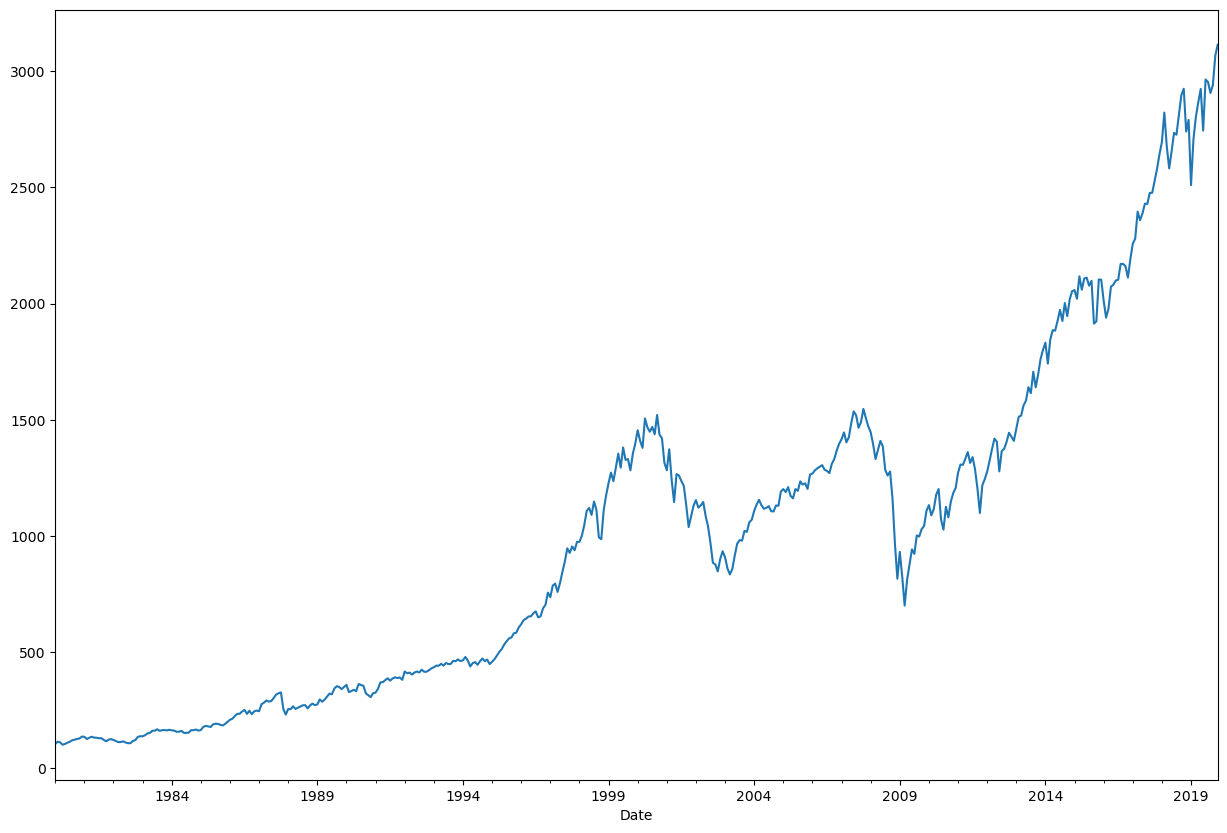

In [15]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15,10))
monthly_close_data["S&P 500"].plot.line(ax = ax)

In [16]:

mu = monthly_returns.mean().mean()
sigma = monthly_returns.std().mean()
print(mu, sigma)

0.008485658938052643 0.04626580494003095


In [17]:
n = monthly_returns.notna().sum().sum()
np.sqrt(n)

158.8332458901473

C:\Users\hkmah\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


Text(0.5, 1.0, 'Distributions of Various Index Fund Returns')

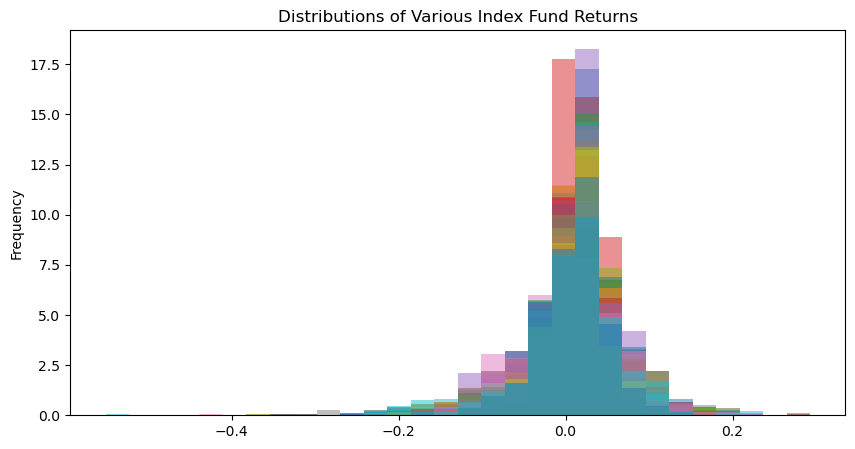

In [18]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(10, 5))

#plot the funds distributions
monthly_returns.plot.hist(bins=30, ax=ax, density=True, alpha=.5, legend=False)

ax.set_title(
    "Distributions of Various Index Fund Returns"
)

In [19]:
# diff_from_sp500 = []
diff_from_sp500 = pd.DataFrame()
for symbol in symbols:
    diff_from_sp500[symbol] = monthly_returns[symbol].sub(monthly_returns["S&P 500"]).dropna()

In [20]:
diff_from_sp500.mean()

AGTHX    0.001646
FCNTX    0.002101
CWMAX    0.001431
CWMCX    0.000794
CWMEX    0.001057
           ...   
FDTRX    0.005349
FDYZX    0.003215
BBVLX   -0.000485
PEYAX   -0.001754
TWCGX    0.002186
Length: 100, dtype: float64

In [21]:
avg_monthly_return.mean()

0.011145289579530917

Text(0.5, 1.0, '$\\bar{X} = $0.18%')

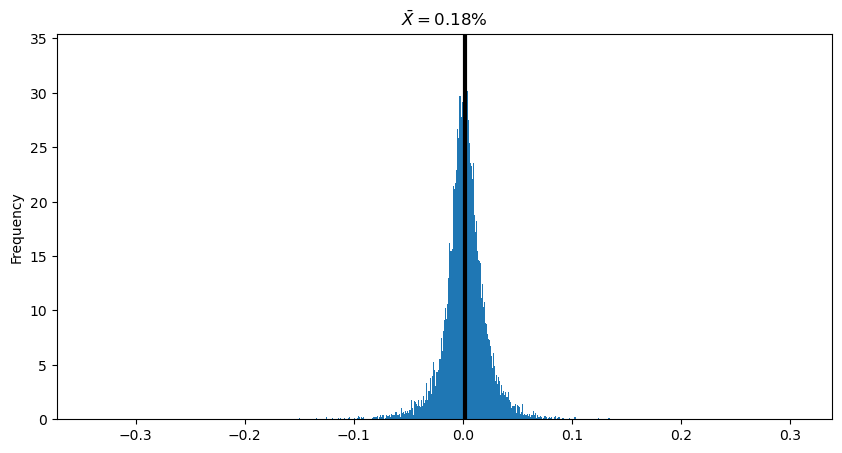

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_df = diff_from_sp500.stack()
plot_df.plot.hist(bins=1000, ax = ax, density = True, legend = False)
ax.axvline(plot_df.mean(), ls = "-", color = "k", linewidth = 3)
ax.set_title("$\\bar{X} = $" +  str(round(plot_df.mean(),4) * 100) + "%")

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

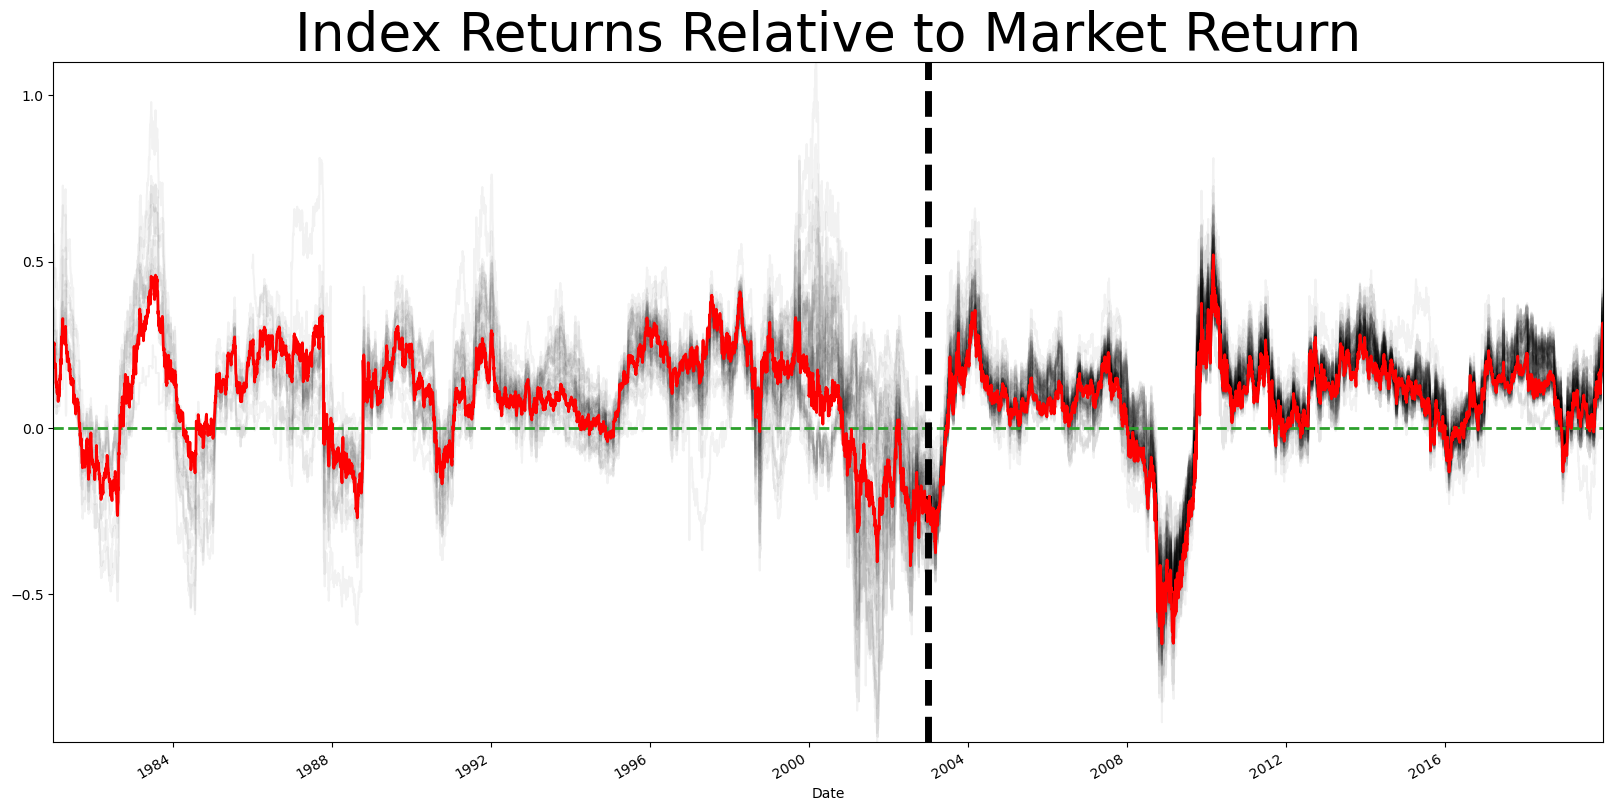

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0  
plt.rcParams['axes.ymargin'] = 0  
# year over year rates of change are easier to interpret
days_per_year = 251
yoy_return = np.log(close_data).diff(days_per_year)
fig, ax = plt.subplots(figsize = (20,10))
yoy_return.plot.line(legend = False, color = "k", alpha = .05, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

yoy_return["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

Text(0.5, 1.0, 'Index Returns Relative to Market Return')

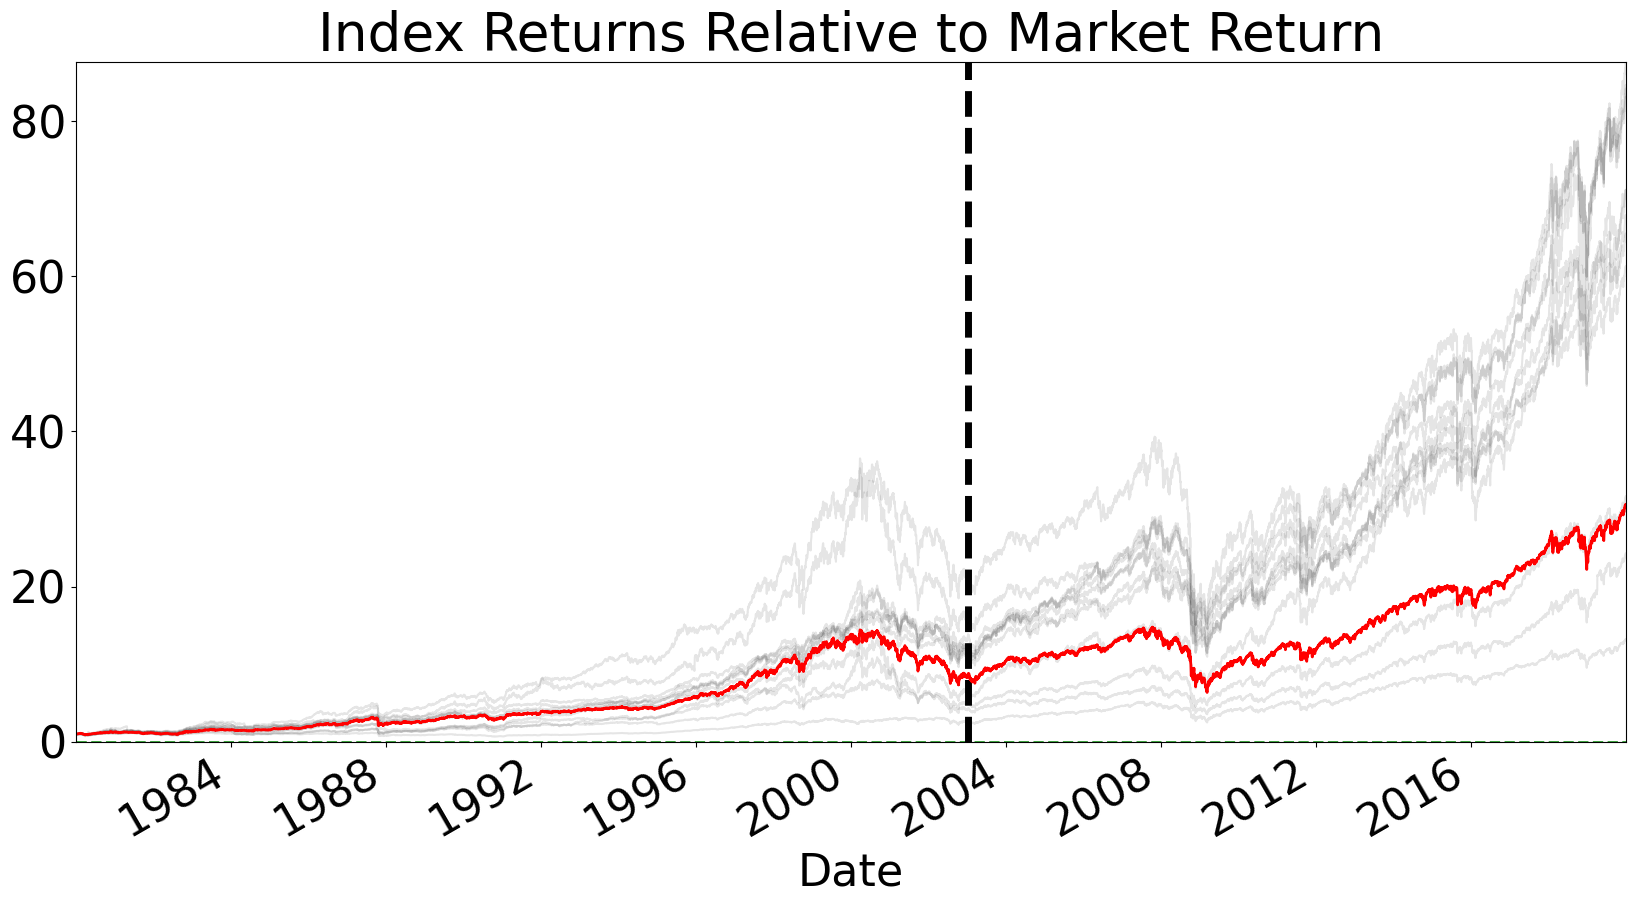

In [24]:
norm_data = close_data.div(close_data.iloc[0])
fig, ax = plt.subplots(figsize = (20,10))
norm_data.plot.line(legend = False, color = "k", alpha = .1, ax = ax)
ax.axhline(0, ls = "--", color = "C2",linewidth = 2)
ax.axvline("2003", ls = "--", color = "k",linewidth = 5)

norm_data["S&P 500"].plot.line(color = "Red", linewidth = 2, ax = ax)
plt.rcParams.update({'font.size': 32})
ax.set_title("Index Returns Relative to Market Return")

### Hypothesis Testing and Confidence Intervals

In [25]:
def t_value_1samp(data, mu):
    x_bar = np.mean(data)
    s = np.std(data)
    n = len(data)
    df = n - 1
    t = (x_bar - mu) / (s / np.sqrt(n))
    
    #return both t and df to be used later in p-value calculations
    return t, df

In [26]:
sp500 = monthly_returns["S&P 500"].dropna()

In [27]:
sp500.mean()

0.0070614806803863525

In [28]:
hypothesized_rate = .07 / 12
hypothesized_rate

0.005833333333333334

In [29]:
t_value_1samp(data=sp500, mu=hypothesized_rate)

(0.6072595645765047, 478)

In [30]:
stats.ttest_1samp(sp500, hypothesized_rate).statistic

0.6066253507590067

In [31]:
stats.ttest_1samp(sp500, 0.14/12).statistic

-2.2746640058630994

In [32]:
# independent samples t-test, setting equal_var=True will turn this test into a paired samples t-test where equal variance
# is assumed
def t_value_ind_samp(a, b, hypothesized_difference=0, equal_var=False):
    
    a = np.array(a)
    b = np.array(b)
    
    s1, n1 = np.var(a) , len(a)
    s2, n2 = np.var(b),  len(b)
    
    # if paired samples, df calculation is different
    if (equal_var):
        df = n1 + n2 - 2
        svar = ((n1 - 1) * s1 + (n2 - 1) * s2) / float(df)
        denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    else:
        vn1 = s1 / n1
        vn2 = s2 / n2
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))
        denom = np.sqrt(vn1 + vn2)

    d = np.mean(a) - np.mean(b) - hypothesized_difference
    t = d / denom
    return t, df

In [33]:
prgfx = monthly_returns["PRGFX"].dropna()
sp500.mean(), prgfx.mean()

(0.0070614806803863525, 0.007124729074338633)

In [34]:
t_value_ind_samp(sp500, prgfx)

(-0.021225028757643278, 950.1085681203306)

In [35]:
means = monthly_returns.mean()
means

Ticker
AFMFX      0.008467
AGTHX      0.008708
AIVSX      0.007065
AKRIX      0.012940
AKRSX      0.014000
             ...   
TWCUX      0.009303
VAFAX      0.007559
VWNFX      0.008301
VWUSX      0.006566
S&P 500    0.007061
Length: 101, dtype: float64

In [36]:
ses = monthly_returns.sem()
ses

Ticker
AFMFX      0.004773
AGTHX      0.002203
AIVSX      0.001983
AKRIX      0.003033
AKRSX      0.004678
             ...   
TWCUX      0.002838
VAFAX      0.003656
VWNFX      0.002148
VWUSX      0.002675
S&P 500    0.002025
Length: 101, dtype: float64

In [37]:
one_sample_test = means.div(ses)
one_sample_test


Ticker
AFMFX      1.773808
AGTHX      3.952657
AIVSX      3.563150
AKRIX      4.266223
AKRSX      2.992459
             ...   
TWCUX      3.277383
VAFAX      2.067631
VWNFX      3.863777
VWUSX      2.454633
S&P 500    3.487915
Length: 101, dtype: float64

Text(0.5, 1.0, '$H_0: \\bar{X}=0$')

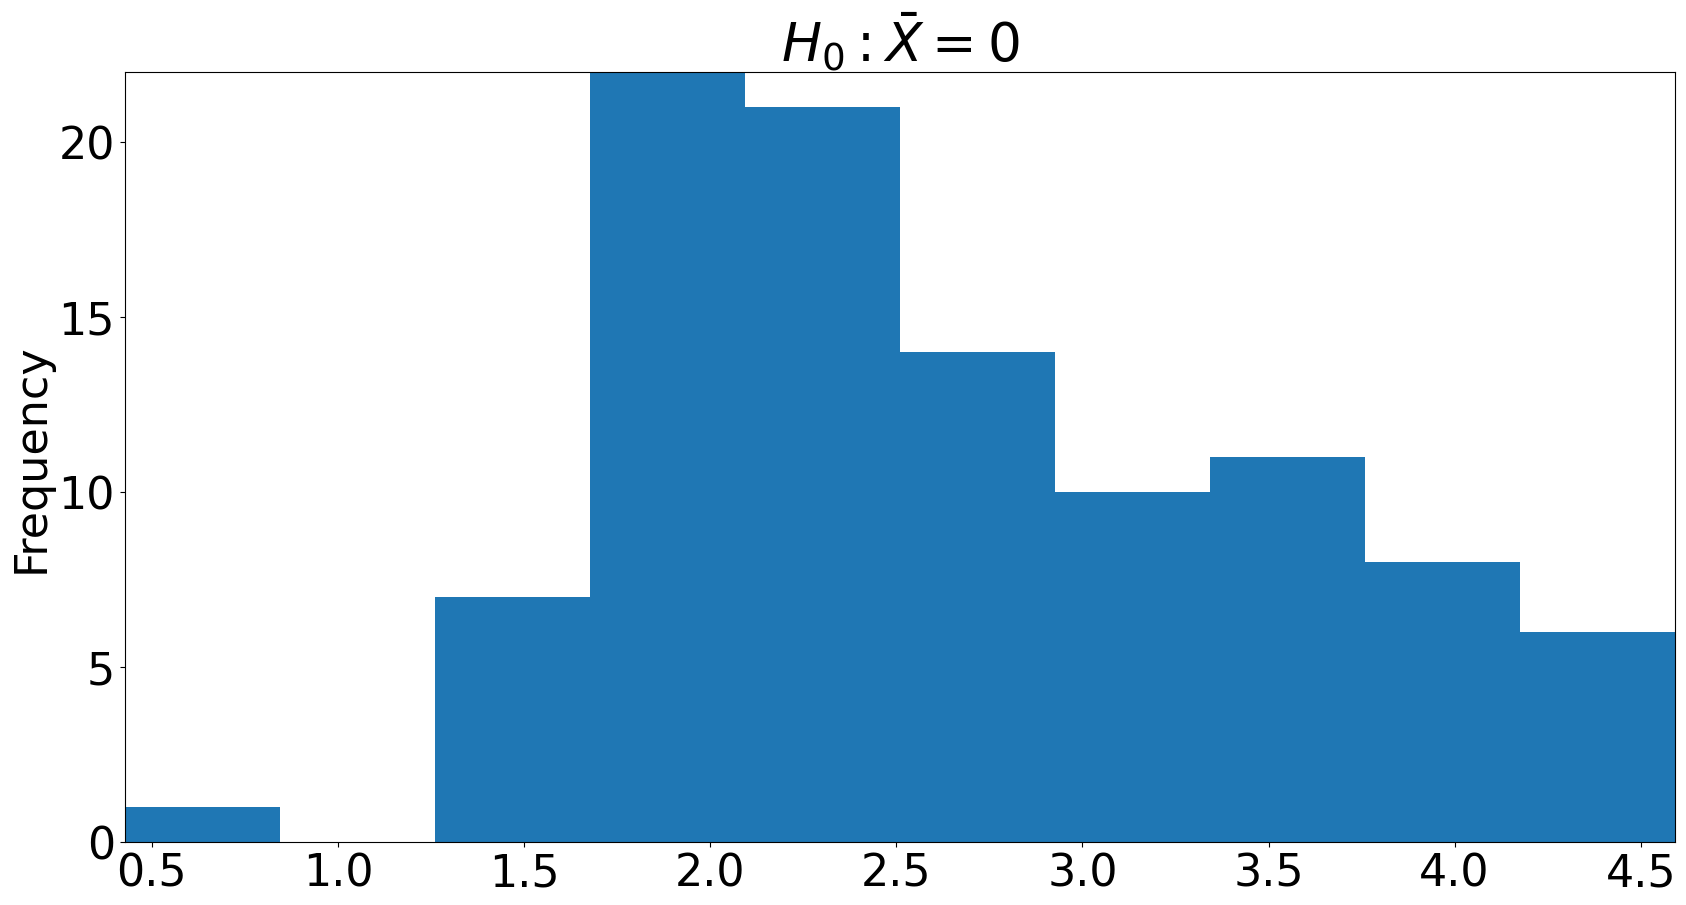

In [38]:
fig, ax = plt.subplots(figsize = (20,10))
one_sample_test.plot.hist(ax = ax)
ax.set_title("$H_0: \\bar{X}=0$")

### Testing all samples against the S&P 500

In [39]:
diff_means = means.sub(means["S&P 500"])
diff_means

Ticker
AFMFX      0.001405
AGTHX      0.001646
AIVSX      0.000004
AKRIX      0.005878
AKRSX      0.006938
             ...   
TWCUX      0.002241
VAFAX      0.000498
VWNFX      0.001239
VWUSX     -0.000496
S&P 500    0.000000
Length: 101, dtype: float64

In [40]:
sn = monthly_returns.std().div(monthly_returns.shape[0])
sn

Ticker
AFMFX      0.000059
AGTHX      0.000100
AIVSX      0.000083
AKRIX      0.000070
AKRSX      0.000070
             ...   
TWCUX      0.000127
VAFAX      0.000100
VWNFX      0.000091
VWUSX      0.000122
S&P 500    0.000092
Length: 101, dtype: float64

In [41]:
t_values = diff_means.div(sn.add(sn["S&P 500"]).pow(.5))
t_values

Ticker
AFMFX      0.114310
AGTHX      0.118564
AIVSX      0.000299
AKRIX      0.460881
AKRSX      0.545260
             ...   
TWCUX      0.151500
VAFAX      0.035841
VWNFX      0.091512
VWUSX     -0.033871
S&P 500    0.000000
Length: 101, dtype: float64

Text(0.5, 1.0, '$H_0: \\bar{X_1}=\\bar{X_2}$')

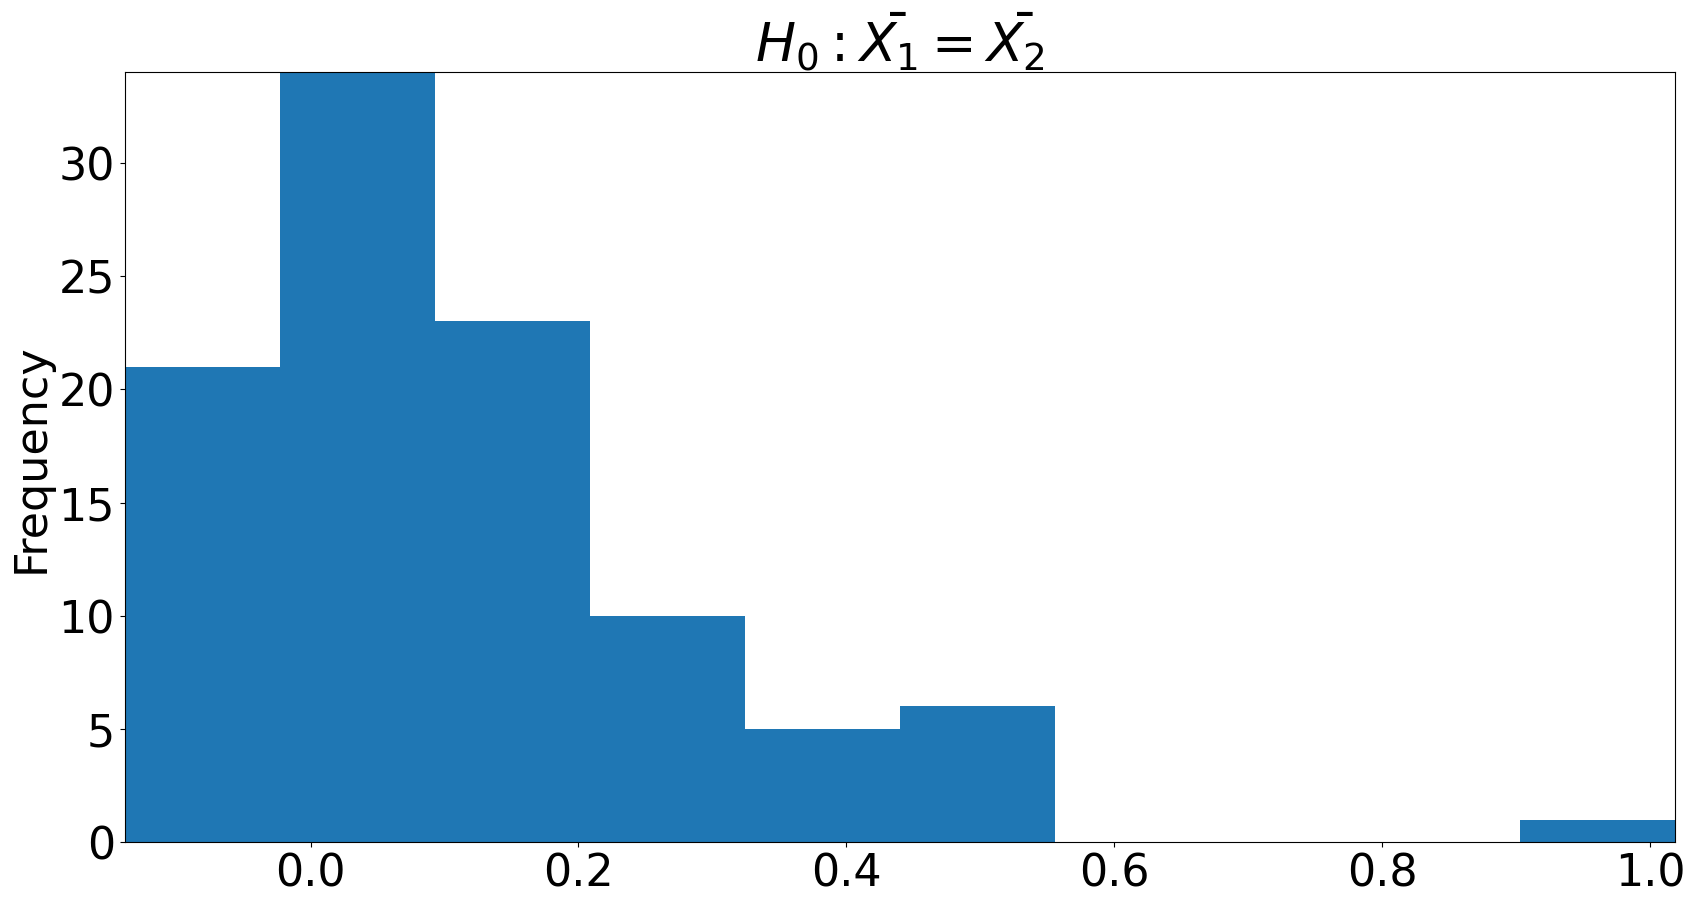

In [42]:
fig, ax = plt.subplots(figsize = (20,10))
t_values.plot.hist(ax = ax)
ax.set_title("$H_0: \\bar{X_1}=\\bar{X_2}$")

####  T Probability Distribution

In [43]:
import scipy.special as sc

# define a function to create the actual distribution from which we can analyze our t value from the t test
def t_distribution(df, t): 
    t_dist_val = ((1 + t**2 / df)
                      **(-(df + 1) / 2)) / (sc.beta(.5, .5 * df) * np.sqrt(df))
    return t_dist_val

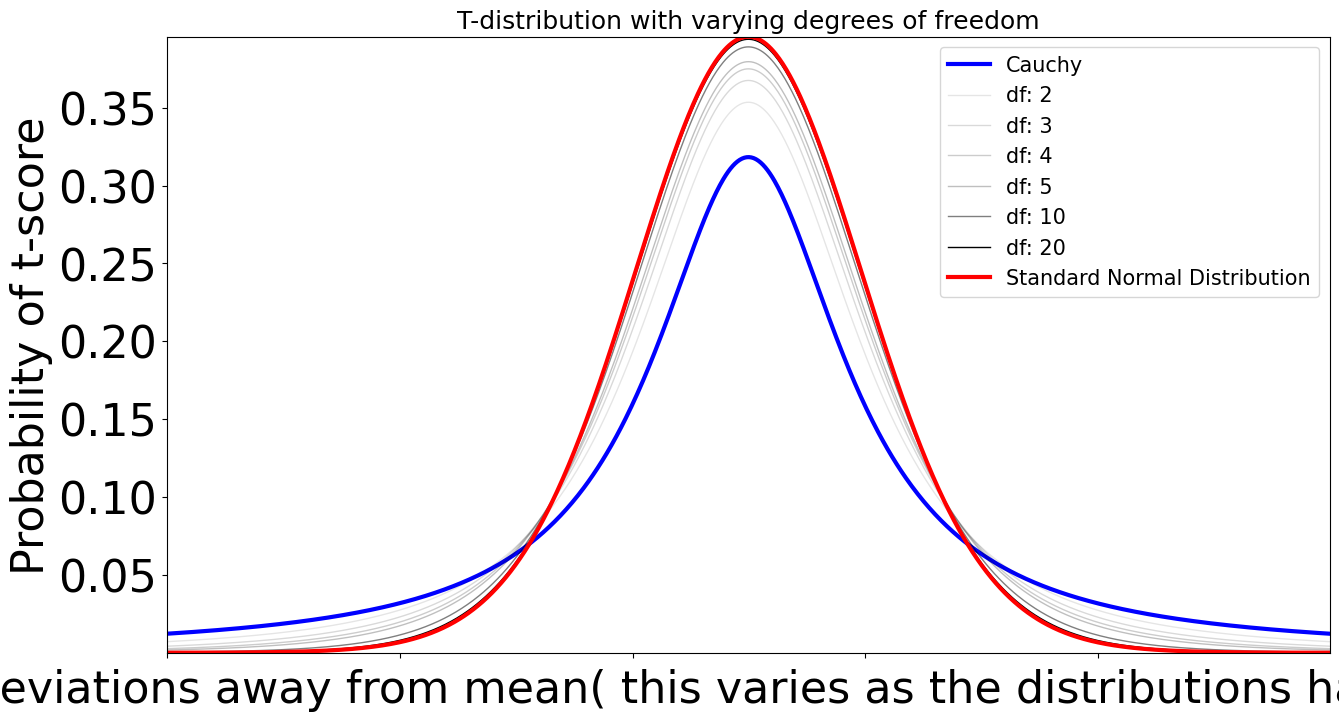

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 8))

x = np.linspace(-5, 5, 1000)
cauchy = t_distribution(1, x)
ax.plot(cauchy, '-', lw=3, alpha=1, label="Cauchy", color='b')
t_df = [2, 3, 4, 5, 10, 20]
for df in t_df:
    dist = t_distribution(df, x)
    ax.plot(dist, '-', lw=1, alpha=df / 20, label="df: " + str(df), color='k')
gaussian = t_distribution(30, x)
ax.plot(gaussian,
        lw=3,
        alpha=1,
        color='r',
        label='Standard Normal Distribution')
plt.rcParams.update({"font.size": 15})
ax.set_ylabel("Probability of t-score")
ax.set_xlabel(
    "Standard Deviations away from mean( this varies as the distributions have different SD's)"
)
plt.title("T-distribution with varying degrees of freedom")
ax.set_xticklabels(labels="")
plt.legend()

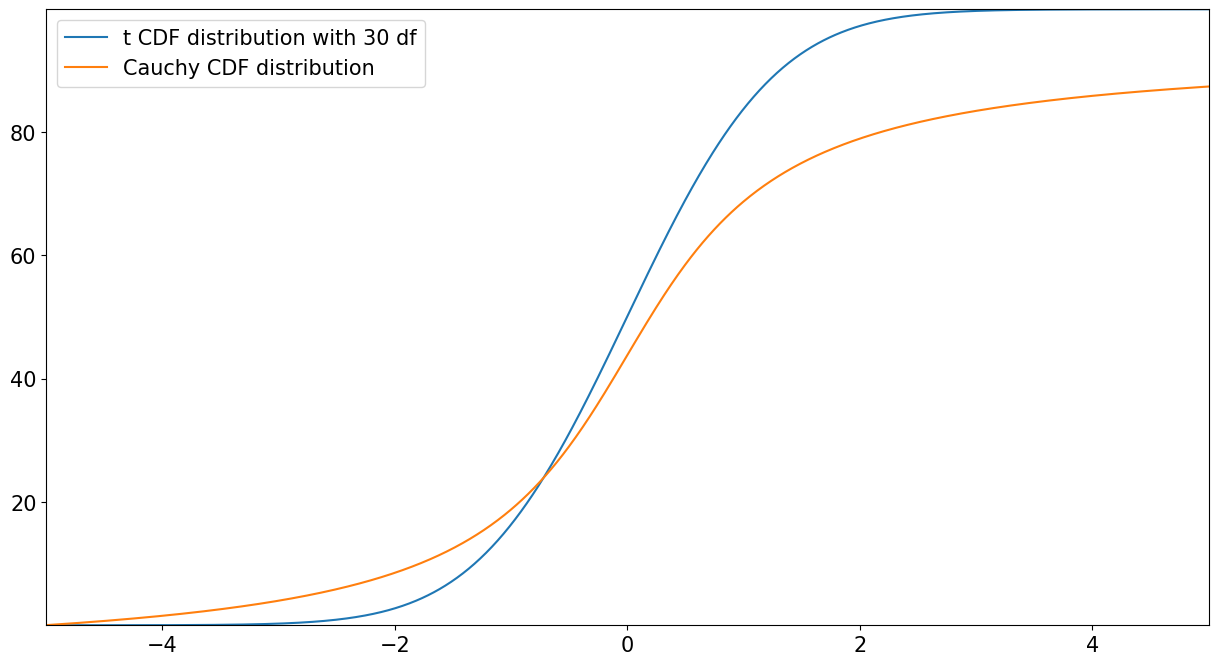

In [45]:
fig, ax = plt.subplots(figsize = (15,8))

#create t-dist with 30 df and with 1 df
x = np.linspace(-5, 5, 1000)
t_dist = t_distribution(30, x)
cauchy = t_distribution(1, x)

#go along the linspace that was created and add current value to all previous values
f_dist = t_dist.copy()
cauchy_f_dist = cauchy.copy()

for i in range(len(t_dist)): 
    f_dist[i] += f_dist[i-1]
    cauchy_f_dist[i] += cauchy_f_dist[i-1]

ax.plot(x, f_dist, label = 't CDF distribution with 30 df')
ax.plot(x, cauchy_f_dist, label = 'Cauchy CDF distribution')

plt.legend()

In [46]:
import scipy.stats as stats

# function that allows us to evaluate the t distribution at a given t value and df
def t_test(a, b, kind):
    
    if kind == 'one_sample': 
            t_val, df = t_value_1samp(a, b)
            print (t_val, df)
    elif kind  == 'independent': 
            t_val, df = t_value_ind_samp(a, b)
    elif kind == 'paired': 
            t_val, df = t_value_ind_samp(a, b, equal_var=True)
            
    # cdf gives probability of a value at least as extreme as observed happening; for two-sided tests this is doubled
    p_value = (1-stats.t.cdf(np.abs(t_val), df-1))  *2
    
    if p_value > .05:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            p_value) + ", Fail to reject null hypothesis."
    else:
        return_string = "T-value: " + str(t_val) + ", P-value: " + str(
            round(p_value, 5)) + ", Reject null hypothesis."
        
    return return_string

### Testing for Normality

In [49]:
from scipy.stats import kurtosis, skew, t

def jarque_bera_test(series, use_sample_ks = False):
    series.dropna(inplace=True)
    print(series)
    n = series.shape[0]

    k = kurtosis(series, fisher=False, bias=not use_sample_ks)
    s = skew(series, bias=not use_sample_ks)
    t = n / 6 * (s ** 2 + (k - 3) ** 2 / 4)

    df = n - 1
    print(k, s, t)
    p = t.sf(t, df=df)
    return t, p


In [50]:
from statsmodels.stats.stattools import jarque_bera
import scipy
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import numpy as np

start = datetime(2012, 1 , 1)
end = datetime.today()

stock_data = {}
stocks = ["MSFT", "AAPL", "PG", "TSLA", '^GSPC']
for key in stocks:
    stock_data[key] = web.get_data_yahoo(key, start, end)["Close"]
stock_data = pd.DataFrame(stock_data).rename(columns = {"^GSPC":"S&P500"})
price_change_data = np.log(stock_data).diff()
price_change_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,MSFT,AAPL,PG,TSLA,S&P500
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,0.023261,0.005360,-0.000449,-0.013264,0.000188
2012-01-05,0.010167,0.011041,-0.004201,-0.021522,0.002939
2012-01-06,0.015415,0.010400,-0.002408,-0.007773,-0.002540
2012-01-09,-0.013250,-0.001587,0.004211,0.012556,0.002259
...,...,...,...,...,...
2024-03-19,0.009753,0.013494,0.003839,-0.014372,0.005633
2024-03-20,0.009024,0.014602,0.000988,0.025017,0.008865
2024-03-21,0.009689,-0.041716,-0.000803,-0.016300,0.003231


In [51]:
for key, val in price_change_data.items():
    print(key)
    print("My JB Function:   ", jarque_bera_test(val))
    print("scipy JB Function:", jarque_bera(val)[:2])

MSFT
Date
2012-01-04    0.023261
2012-01-05    0.010167
2012-01-06    0.015415
2012-01-09   -0.013250
2012-01-10    0.003598
                ...   
2024-03-19    0.009753
2024-03-20    0.009024
2024-03-21    0.009689
2024-03-22   -0.001468
2024-03-25   -0.013810
Name: MSFT, Length: 3075, dtype: float64
11.530694071831363 -0.19931529033566373 9344.367359900092


AttributeError: 'numpy.float64' object has no attribute 'sf'

#### Confidence Intervals

In [52]:
def t_quintile(df, alpha):
    q = (1.0+alpha)/2
    a = stats.t.ppf(q, df)
    return a

In [53]:
t_quintile(len(sp500), 0.05)

0.06273964329541434

In [54]:
def confidence_interval(data, alpha):
    n = len(data)
    df = n - 1
    x_bar = np.mean(data)
    SE = np.std(data) / np.sqrt(n)
    CI_quintile = t_quintile(df, alpha)
    CI = x_bar - CI_quintile * SE, x_bar + CI_quintile * SE
    return CI

In [55]:
sp500_CI = confidence_interval(sp500, 0.05)
sp500_CI

(0.006934593241426297, 0.007188368119346408)

In [56]:
sp500_yearly_CI = (1 + sp500_CI[0]) ** 12, (1 + sp500_CI[1]) ** 12

In [57]:
sp500_yearly_CI

(1.0864634873490415, 1.0897538656572028)

In [58]:
prgfx_CI = confidence_interval(prgfx, 0.05)
sp500_CI = confidence_interval(sp500, 0.05)
print("SP500 CI: ", sp500_CI,"\nPRGFX CI",prgfx_CI)

SP500 CI:  (0.006934593241426297, 0.007188368119346408) 
PRGFX CI (0.006987423500922125, 0.007262034647755141)


In [59]:
len(sp500)

479

In [60]:
monthly_returns.mean().rank

<bound method NDFrame.rank of Ticker
AFMFX      0.008467
AGTHX      0.008708
AIVSX      0.007065
AKRIX      0.012940
AKRSX      0.014000
             ...   
TWCUX      0.009303
VAFAX      0.007559
VWNFX      0.008301
VWUSX      0.006566
S&P 500    0.007061
Length: 101, dtype: float64>

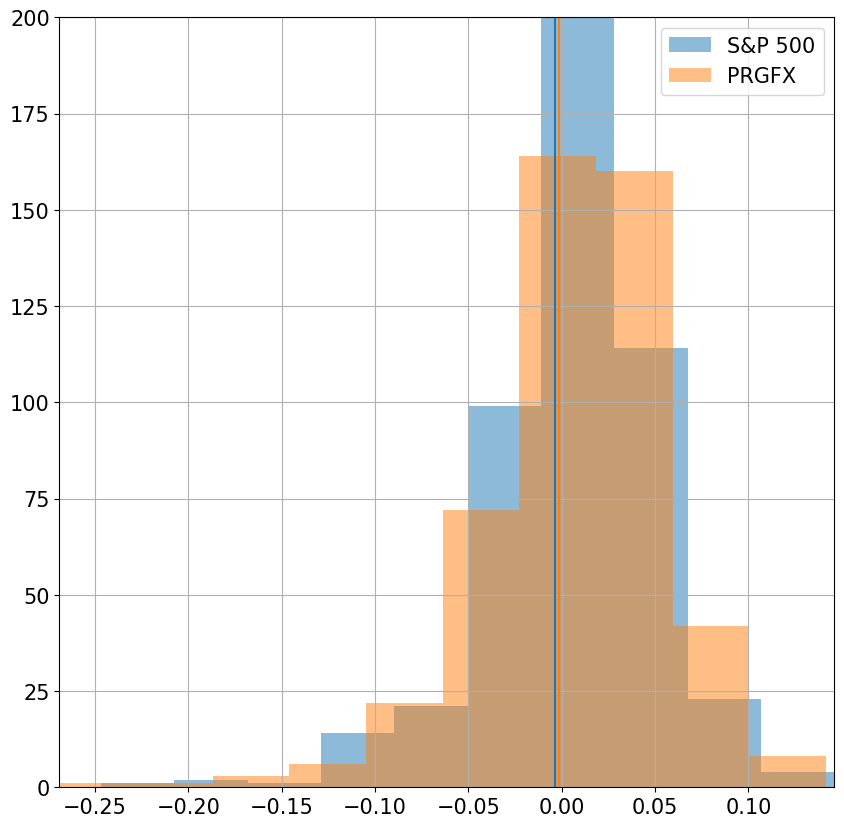

In [61]:
fig, ax = plt.subplots(figsize = (10, 10))
sp500.hist(ax=ax, label='S&P 500', alpha = .5)
prgfx.hist(ax=ax, label='PRGFX', alpha = .5)
ax.axvline((sp500.iloc[-1] /sp500.iloc[0]) ** (1 / sp500.count()) -1, color = "C0")
ax.axvline((prgfx.iloc[-1] /prgfx.iloc[0]) ** (1 / prgfx.count()) -1, color = "C1")

plt.legend()

In [62]:

monthly_returns_CIs = confidence_interval(monthly_returns, 0.05)

In [63]:
len(monthly_returns_CIs)

2

In [64]:
monthly_returns_CIs[0]["S&P 500"], monthly_returns_CIs[1]["S&P 500"]

(0.007938355762993938, 0.00819186587636402)

In [65]:
 monthly_returns_CIs[1].rank()["S&P 500"]

46.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


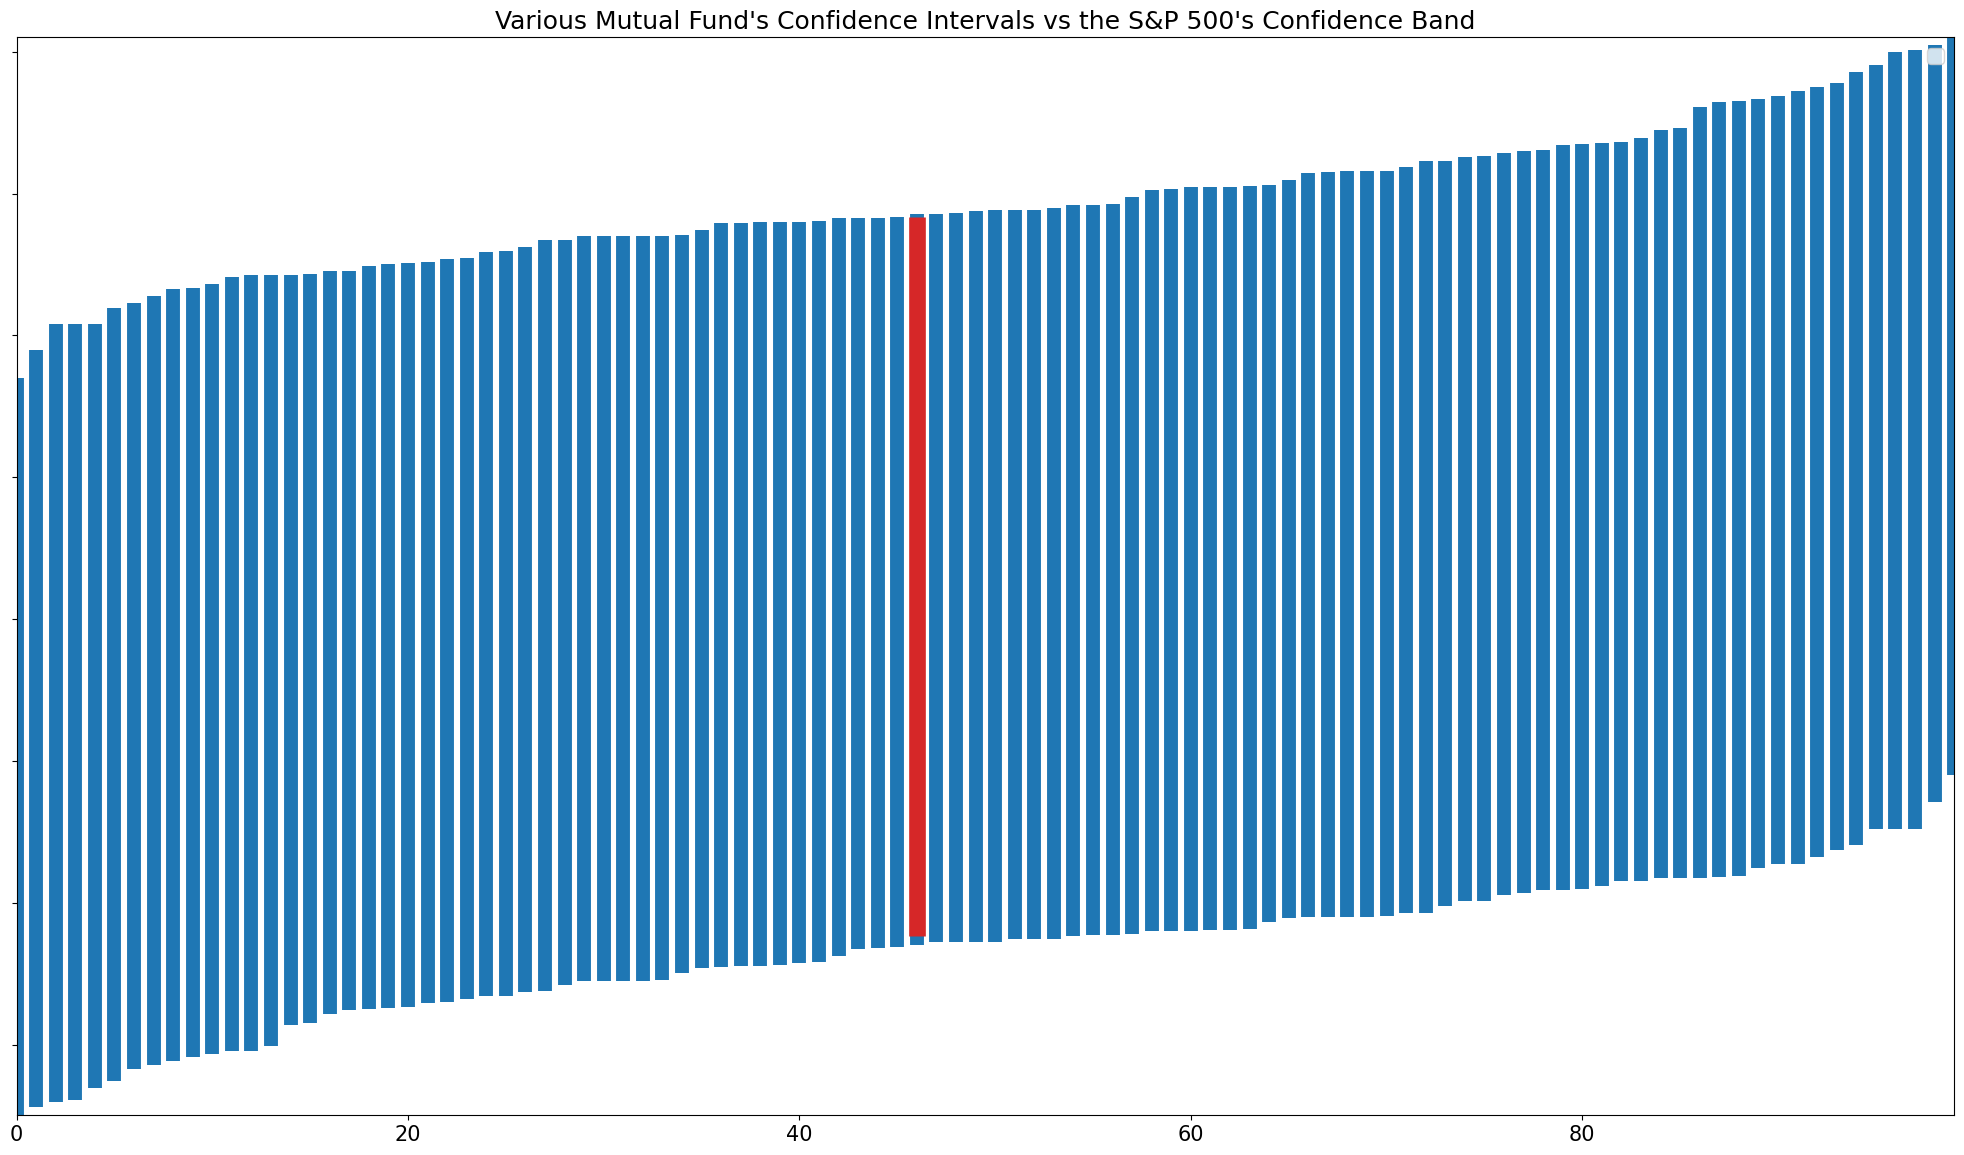

In [66]:
fig, ax = plt.subplots(figsize = (25, 14))
Y_axis = np.arange(len(monthly_returns_CIs[0]))

ax.vlines(x = Y_axis, ymin = monthly_returns_CIs[0].sort_values(), ymax = monthly_returns_CIs[1].sort_values(), linewidth=10 )
ax.vlines(x =  monthly_returns_CIs[1].rank()["S&P 500"], 
          ymin =monthly_returns_CIs[0]["S&P 500"], 
          ymax = monthly_returns_CIs[1]["S&P 500" ], 
          color = "C3",
          linewidth=12 )

#ax.vlines(x = [sp500_CI[0],sp500_CI[1]], ymin = 0, ymax = len(monthly_returns_CIs[0]), label = "S&P 500 CI", color='r', linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_yticklabels([])
ax.legend()

In [67]:
yearly_close_data = pd.DataFrame(close_data).resample("Y").first()
yearly_changes = np.log(yearly_close_data).diff()
yearly_changes

Ticker,AFMFX,AGTHX,AIVSX,AKRIX,AKRSX,AMCFX,AMCPX,AMRFX,AMRMX,ANCFX,...,RPMGX,SBLYX,SEEGX,TRBCX,TWCGX,TWCUX,VAFAX,VWNFX,VWUSX,S&P 500
Date,,,,,,,,,,,,,,,,,,,,,
1980-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-12-31,NaN,0.373945,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.219248,...,NaN,NaN,NaN,NaN,0.444489,NaN,NaN,NaN,0.292461,0.253979
1982-12-31,NaN,-0.020713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.010941,...,NaN,NaN,NaN,NaN,-0.155439,-0.012121,NaN,NaN,-0.008201,-0.105083
1983-12-31,NaN,0.192326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270907,...,NaN,NaN,NaN,NaN,0.013849,0.258290,NaN,NaN,0.181910,0.119646
1984-12-31,NaN,0.207397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.250165,...,NaN,NaN,NaN,NaN,0.230555,0.247645,NaN,NaN,0.050682,0.170396
1985-12-31,NaN,-0.087750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007458,...,NaN,NaN,NaN,NaN,-0.244129,-0.258694,NaN,NaN,-0.022556,0.008075
1986-12-31,NaN,0.171686,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221965,...,NaN,NaN,NaN,NaN,0.299126,0.243879,NaN,0.103741,0.230368,0.236968
1987-12-31,NaN,0.112441,0.024667,NaN,NaN,NaN,0.040800,NaN,0.121338,0.038210,...,NaN,NaN,NaN,NaN,0.496225,0.117398,NaN,0.172813,-0.087273,0.162006
1988-12-31,NaN,0.004728,0.002422,NaN,NaN,NaN,0.056241,NaN,0.017345,-0.016121,...,NaN,NaN,NaN,NaN,0.137327,0.085509,NaN,-0.001301,-0.351368,0.037784


In [68]:
yearly_return_CIs = confidence_interval(yearly_changes, 0.05)

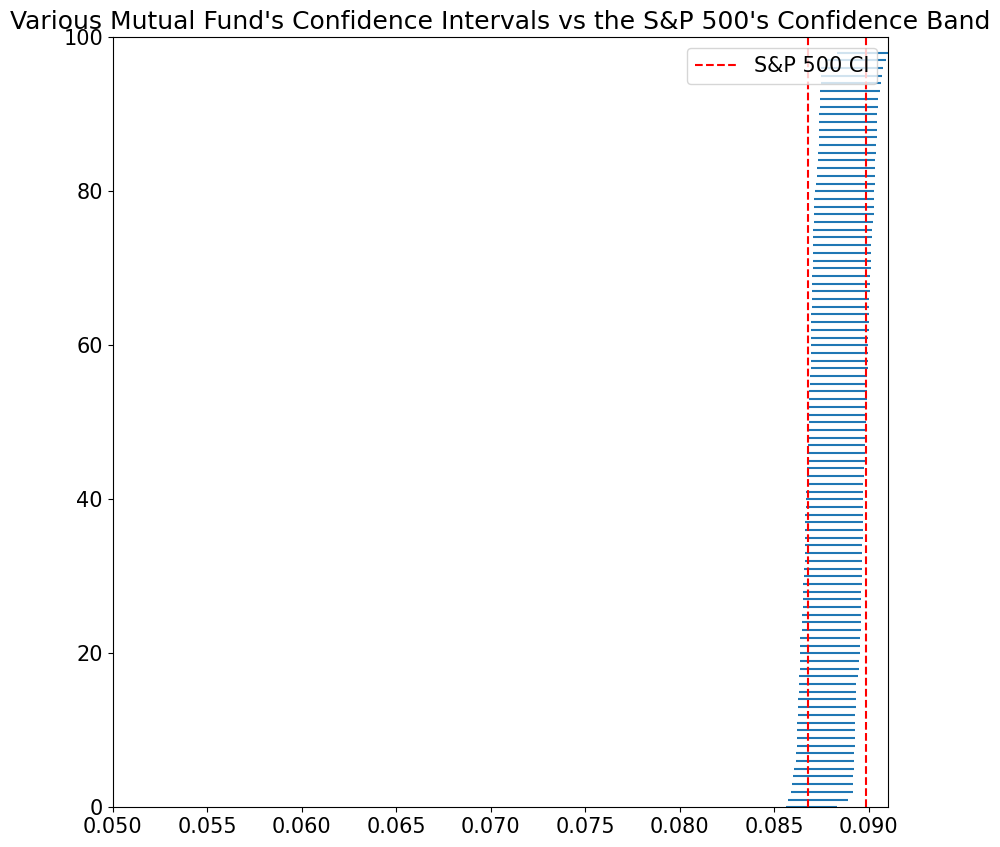

In [69]:
fig, ax = plt.subplots(figsize = (10, 10))
Y_axis = np.arange(len(yearly_return_CIs[0]))

ax.hlines(y = Y_axis, xmin = yearly_return_CIs[0].sort_values(), xmax = yearly_return_CIs[1].sort_values() )
ax.vlines(x = [yearly_return_CIs[0]["S&P 500"],yearly_return_CIs[1]["S&P 500"]], ymin = 0, ymax = 100, label = "S&P 500 CI", color="r", linestyle="--")
ax.set_title("Various Mutual Fund's Confidence Intervals vs the S&P 500's Confidence Band")
ax.set_xlim(0.05)
ax.legend()

### ANOVA

In [70]:
mutual_fund_data[["Symbol", "Morningstar Category"]]

,Symbol,Morningstar Category
0,AGTHX,Large Growth
1,FCNTX,Large Growth
2,CWMAX,Large Blend
3,CWMCX,Large Blend
4,CWMEX,Large Blend
...,...,...
95,FDTRX,Large Growth
96,FDYZX,Large Growth
97,BBVLX,Large Value
98,PEYAX,Large Value


In [71]:
mutual_fund_data["Morningstar Category"].value_counts()

Morningstar Category
Large Growth      51
Large Value       20
Large Blend       17
Mid-Cap Growth     6
Mid-Cap Value      2
Health             1
Mid-Cap Blend      1
Communications     1
Small Value        1
Name: count, dtype: int64

In [72]:
fund_types = mutual_fund_data["Morningstar Category"].value_counts() > 2
fund_types

Morningstar Category
Large Growth       True
Large Value        True
Large Blend        True
Mid-Cap Growth     True
Mid-Cap Value     False
Health            False
Mid-Cap Blend     False
Communications    False
Small Value       False
Name: count, dtype: bool

In [73]:
relevant_fund_types = fund_types[fund_types]
relevant_fund_types

Morningstar Category
Large Growth      True
Large Value       True
Large Blend       True
Mid-Cap Growth    True
Name: count, dtype: bool

In [74]:
relevant_funds = mutual_fund_data[mutual_fund_data["Morningstar Category"].isin(relevant_fund_types.index)]
relevant_funds

,Symbol,Name,Morningstar Category,Market cap,Fees
0,AGTHX,American Funds The Growth Fund of America Class A,Large Growth,"$138,592,080,000",0.62%
1,FCNTX,Fidelity Contrafund Fund,Large Growth,"$121,762,870,000",0.74%
2,CWMAX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",0.63%
3,CWMCX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",1.40%
4,CWMEX,American Funds Washington Mutual Investors Fun...,Large Blend,"$113,300,000,000",0.87%
...,...,...,...,...,...
95,FDTRX,Franklin DynaTech Fund Class R6,Large Growth,"$9,600,000,000",0.51%
96,FDYZX,Franklin DynaTech Fund Advisor Class,Large Growth,"$9,600,000,000",0.62%
97,BBVLX,Bridge Builder Large Cap Value Fund,Large Value,"$9,500,000,000",0.25%
98,PEYAX,Putnam Large Cap Value Fund Class A,Large Value,"$9,393,340,000",0.91%


In [75]:
relevant_fund_type_names = {}
for fund_type in relevant_fund_types.index:
    relevant_fund_type_names[fund_type] = relevant_funds["Symbol"][relevant_funds["Morningstar Category"] == fund_type]

### F Test

In [78]:
def get_anova_counts(*args):
    k = len(args)
    N = 0
    for arg in args:
        N += len(arg)
    dfbn = k - 1
    dfwn = N - k

    return k, N, dfbn, dfwn

In [ ]:
get_anova_counts(fund_type_returns["Large Growth"],
                 fund_type_returns['Large Value'],
                 fund_type_returns['Large Blend'],
                 fund_type_returns['Mid-Cap Growth'])